In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

red = pd.read_csv("D:\python3\DL/winequality-red.csv")
red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [22]:
def fc(data):
    if data > 5:
        return 1
    return 0
red['quality'] = red['quality'].apply(fc)

In [23]:
red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [24]:
# 스케일링 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X = red[red.columns.difference(['quality'])]
X.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [25]:
scaler.fit(X)

X_scaled = scaler.transform(X)

In [26]:
X_scaled = pd.DataFrame(X_scaled)

In [27]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [28]:
X_scaled.columns = X.columns

In [29]:
import statsmodels.api as sm
y = red['quality']

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     60.79
Date:                Thu, 27 May 2021   Prob (F-statistic):          6.19e-113
Time:                        16:03:52   Log-Likelihood:                -875.56
No. Observations:                1599   AIC:                             1775.
Df Residuals:                    1587   BIC:                             1840.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4490      0.098      4.590      0.000       0.257       0.641
alcohol                  0.9956      0.112      8.924      0.000       0.777       1.214
chlorides               -0.4675      0.163     -2.872      0.004      -0.787      -0.148
citric acid             -0.1894      0.095     -1.986      0.047      -0.377      -0.002
density                 -0.1040      0.191     -0.545      0.586      -0.479       0.271
fixed acidity            0.2631      0.190      1.385      0.166      -0.110       0.636
free sulfur dioxide      0.3169      0.100      3.172      0.002       0.121       0.513
pH                      -0.0864      0.158     -0.548      0.584      -0.396       0.223
residual sugar           0.1136      0.142      0.801      0.424      -0.165       0.392
sulphates                0.8563      0.124      6.920      0.000       0.614       1.099
total sulfur dioxide    -0.8912      0.134     -6.668      0.000      -1.153      -0.629
volatile acidity        -0.8256      0.115     -7.205      0.000      -1.050      -0.601
==============================================================================
Omnibus:                      177.412   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.786
Skew:                           0.031   Prob(JB):                     1.55e-11
Kurtosis:                       2.138   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

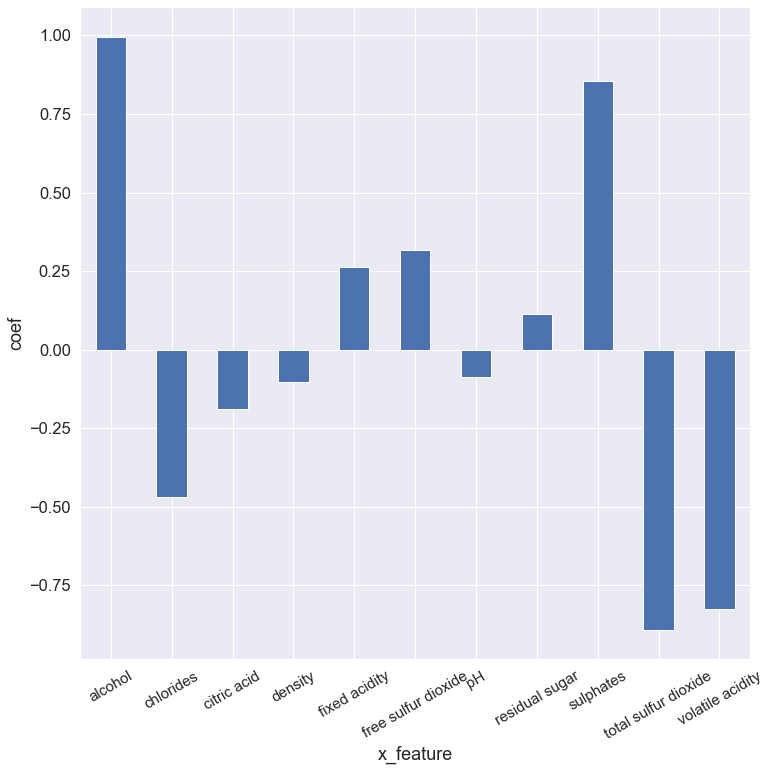

In [30]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [12,12]
coefs = model.params.tolist()[1:]      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()[1:]

ax = coef_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30, fontsize=15)
plt.show()

In [31]:
# 회귀분석의 예측 성능을 높이기 위한 방법 : 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif['feature'] = X_scaled.columns
vif.round(1)

,VIF Factor,feature
0,86.8,const
1,3.0,alcohol
2,1.5,chlorides
3,3.1,citric acid
4,6.3,density
5,7.8,fixed acidity
6,2.0,free sulfur dioxide
7,3.3,pH
8,1.7,residual sugar
9,1.4,sulphates


### 다중공선성 확인결과
#### VIF Factor 계수가 10을 넘는 것이 없으므로, 삭제할 피처가 없음

In [32]:
vif[1:]

,VIF Factor,feature
1,3.031160,alcohol
2,1.481932,chlorides
3,3.128022,citric acid
4,6.343760,density
5,7.767512,fixed acidity
6,1.963019,free sulfur dioxide
7,3.329732,pH
8,1.702588,residual sugar
9,1.429434,sulphates
10,2.186813,total sulfur dioxide


In [33]:
corr = vif[1:].corr()
corr

,VIF Factor
VIF Factor,1.0


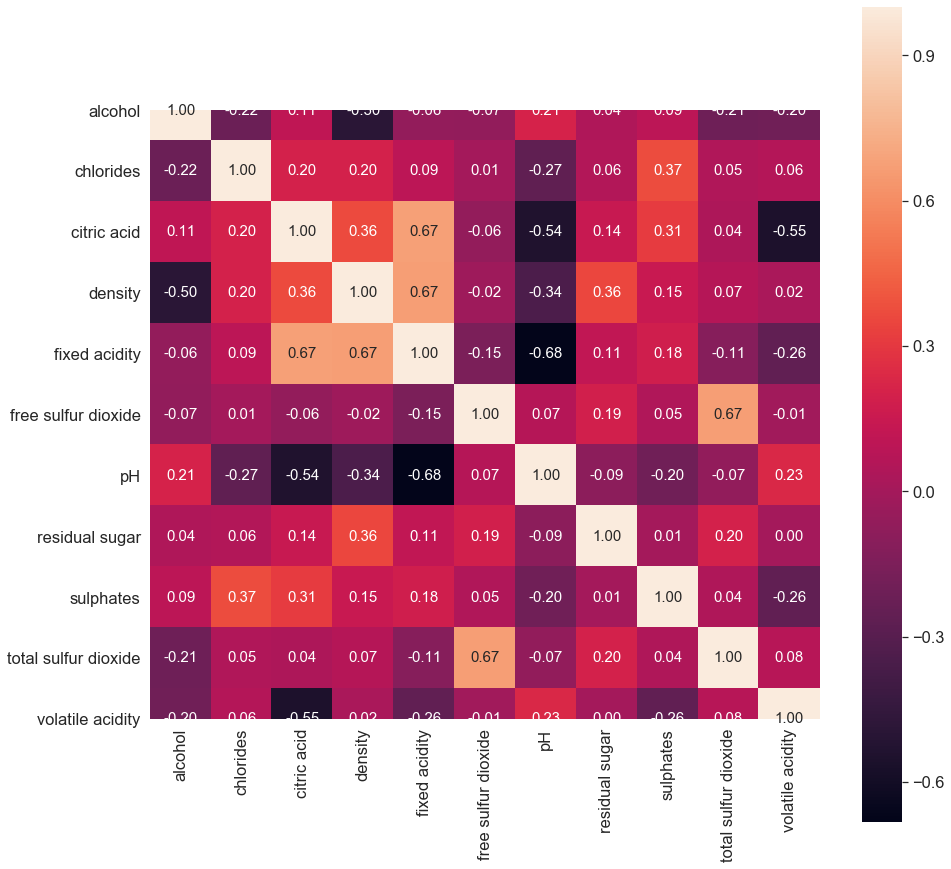

In [34]:
scale_columns = X_scaled.columns[1:]

corr = X_scaled[scale_columns].corr(method='pearson')
show_cols = X_scaled.columns[1:]

plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)       # 폰트 비율
hm = sns.heatmap(corr.values,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)
plt.show()

In [35]:
X_scaled = X_scaled[X_scaled.columns.difference(['const','free sulfur dioxide','total sulfur dioxide'])]
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.362205,0.116438,0.209581,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.409449,0.095890,0.191617,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.330709,0.068493,0.149701,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260


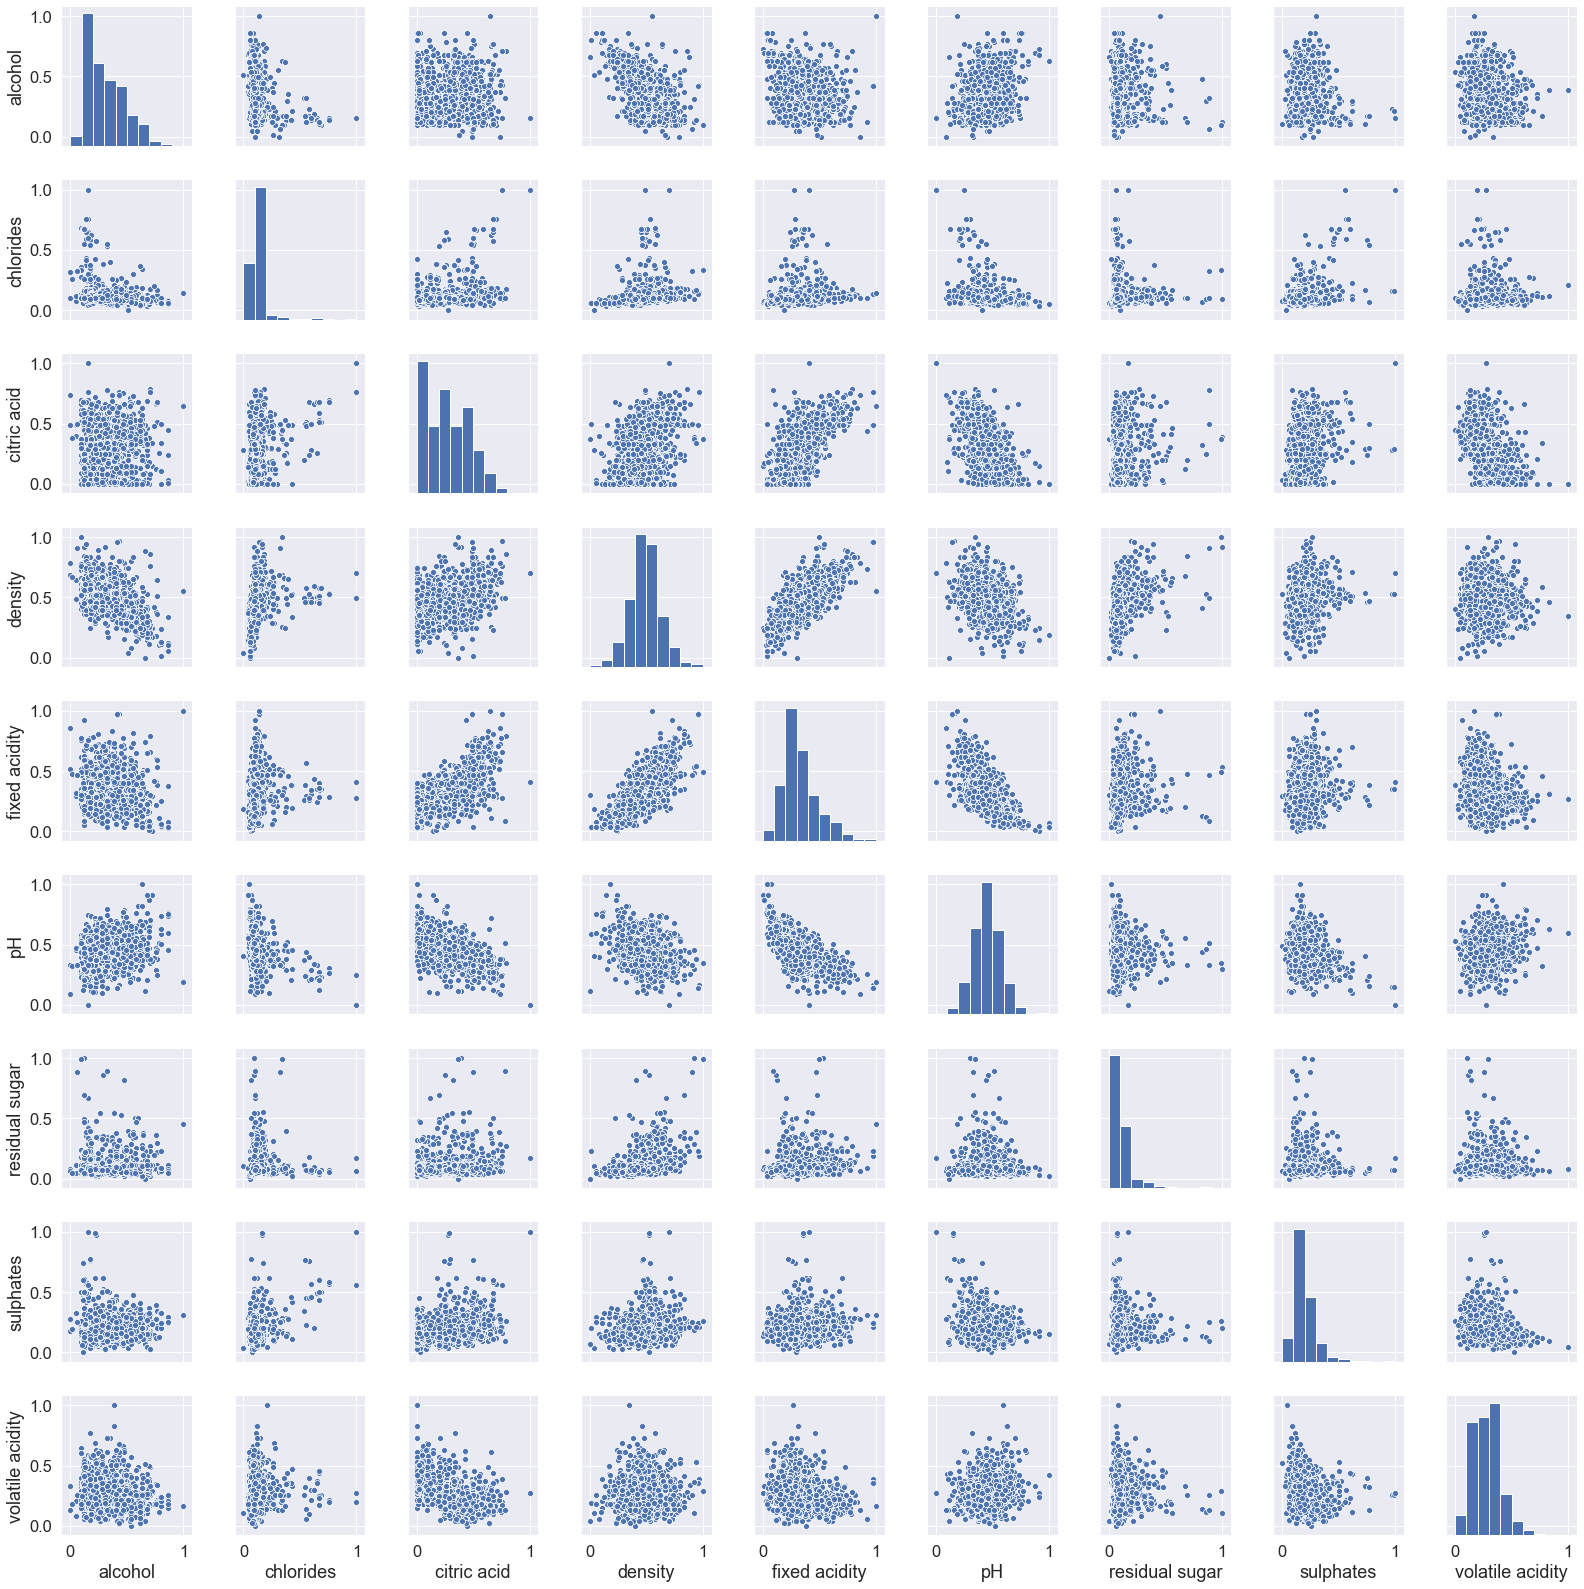

In [16]:
sns.pairplot(X_scaled)
plt.show()

In [36]:
red_final = red[red.columns.difference(['free sulfur dioxide','total sulfur dioxide'])]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,quality,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,0,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,1,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,1,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,0,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,1,3.6,0.66,0.310


- 정규화 안한거 - red_final
- 정규화(품질 빼고) - X_scaled

In [37]:
red_final2 = red_final[red_final.columns[:-1]]

In [38]:
# red_final2 , y 데이터 split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(red_final2,y,
                                                    stratify=y, test_size=0.2, random_state=42)

In [77]:
# red_final2 데이터 LogisticReression 모델 훈련 및 평가
x1 = x_train.values
y1 = y_train.values
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=100).fit(x1, y1)
predict = clf.predict(x1)
accuracy=(predict.reshape(-1,1) == y1.reshape(-1,1)).sum()/len(y1)
print(accuracy)

1.0


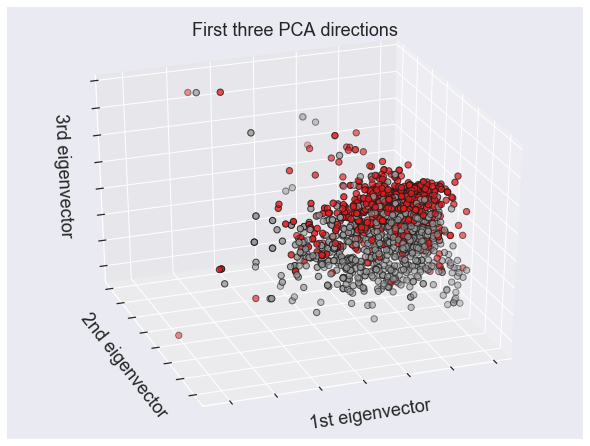

In [78]:
# red_final2 데이터 PCA(주성분 분석) 차원 축소

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(red_final2[red_final2.columns[:]])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [82]:
# PCA로 차원 축소된 feature 추출한 X_reuced  DF 으로 형변환 

X2= pd.DataFrame(X_reduced)
X2.head()
# X = pd.Series(X_reduced)

,0,1,2
0,-1.040110,-0.515497,-1.115052
1,-0.485223,0.107977,-0.777875
2,-0.557599,-0.181136,-0.746799
3,2.696794,-1.355114,-0.242958
4,-1.040110,-0.515497,-1.115052


In [48]:
# X_scaled, y 데이터 split

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled,y,
                                                    stratify=y, test_size=0.2, random_state=42)

In [76]:
# X_scaled 데이터 RogisticRegression 모델 훈련 및 평가

x3 = x_train2.values
y3 = y_train2.values
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=100).fit(x3, y3)
predict = clf.predict(x3)
accuracy=(predict.reshape(-1,1) == y3.reshape(-1,1)).sum()/len(y3)
print(accuracy)

0.7349491790461298


In [52]:
from sklearn.linear_model import SGDClassifier   # 경사하강법 클래스

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train2, y_train2)
sgd.score(x_test2,y_test2)

0.71875

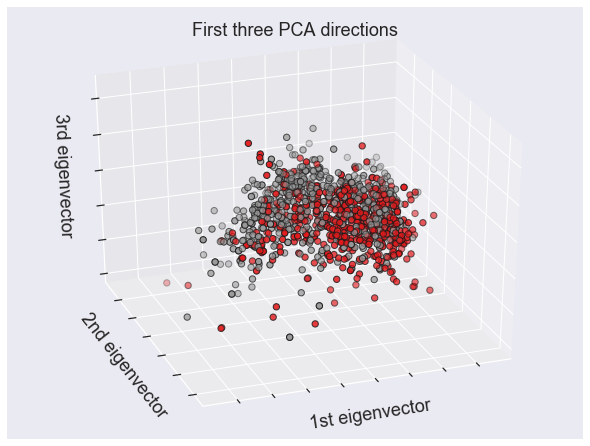

In [51]:
# X_scaled 데이터 차원축소

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced2 = PCA(n_components=3).fit_transform(x_train2[x_train2.columns[:]])
ax.scatter(X_reduced2[:, 0], X_reduced2[:, 1], X_reduced2[:, 2], c=y_train2,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [62]:
# PCA로 차원 축소된 feature 추출한 X_reuced  DF 으로 형변환 

X3= pd.DataFrame(X_reduced2)
X3.head()
# X = pd.Series(X_reduced)

,0,1,2
0,-0.125519,-0.140426,-0.072993
1,-0.232458,-0.109872,-0.046711
2,0.076895,-0.008879,0.023267
3,-0.357826,-0.133012,0.022184
4,-0.315468,0.023303,0.090822


In [74]:
# X_scaled 데이터 PCA로 차원 축소한 feature로 RogisticRegression 모델 훈련 및 평가

x4 = X3[X3.columns[:]].values
y4 = y_train2.values
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=100).fit(x4, y4)
predict = clf.predict(x4)
accuracy=(predict.reshape(-1,1) == y4.reshape(-1,1)).sum()/len(y4)
print(accuracy)

0.6982017200938233


In [53]:
# 신경망 구축
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = [] # 손실값을 저장하는 객체
    
    # 정방향 계산 - 선형함수(직선방정식 이용해서 계산)
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    #  역방향계산 - 경사하강법
    def backprob(self, x, err):
        w_gred = x * err # 가중치에 대한 경사 계산
        b_gred = 1 * err # 절편에 대한 경사 계산
        return w_gred, b_gred
    
    # 훈련을 시키는 매서드
    def fit(self, x, y, epochs =100):
      
        # 가중치를 모든 샘플에 1로 초기화
        self.w = np.ones(x.shape[1])
        # 절편
        self.b= 0
        
        for i in range(epochs):
            loss = 0
            # 모든 샘플에 대한 반복 작업을 위해서 인덱스를 섞는 작업
            indexes = np.random.permutation(np.arange(len(x)))
            
            for i in indexes:
                # 정방향 계산
                z = self.forpass(x[i])
                #  활성화 함수적용
                a = self.activation(z)
                #  오차 계산
                err = -(y[i] - a )
                # 역방향 계산
                w_gred, b_gred = self.backprob(x[i], err)
                self.w -= w_gred
                self.b -= b_gred
                
                # 안전한 로그함수의 계산을 위해 클리핑한 후 손실을 누적
                a = np.clip(a,1e-10,1-1e-10)
                # 에포크마다 손실을 저장
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            
            self.losses.append(loss/len(y))
        
    
    # 활성화 함수 z = -무한대 ~ +무한대
    def activation(self,z):
        # 시그모이드 계산
        a = 1/(1+np.exp(-z))
        return a
    
    # 예측하는 메서드
    def predict(self, x):
        # 선형함수 적용, 리스트 내포 문법
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        # 계단 함수 적용
        return a > 0.5
    
     # 평가함수
    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [54]:
layer = SingleLayer()
layer.fit(x_train2, y_train2)
layer.score(x_test2,y_test2)

KeyError: 261

### 30. CNN(합성곱 신경망)

In [55]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(red_final2,y,
                                                    stratify=y, test_size=0.2, random_state=42)
# 검증세트
train_scaled, val_scaled, train_target, val_target =\
train_test_split(x_train, y_train, test_size=0.2,random_state=42)

In [56]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3,
                              activation='relu', padding='same', input_shape=(28,28,1)))

In [57]:
model.add(keras.layers.MaxPool2D(2))

In [58]:
model.add(keras.layers.Conv2D(64, kernel_size=3,
                              activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [59]:
model.add(keras.layers.Flatten())                         # 밀집층
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [61]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])
# model.fit(train_scaled, train_target, epochs=5)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (1023, 9)